# Antes de empezar:

    Lee el archivo README.md
    Comenta todo lo que puedas y utiliza los recursos (archivo README.md)
    ¡Feliz aprendizaje!

En este ejercicio, generaremos números aleatorios a partir de las disribuciones continuas que aprendimos en la lección. Hay dos formas de generar números aleatorios:

1. Usando la librería numpy 
1. Usando la librería Scipy 

Utiliza cualquiera de las dos librerías o ambas en este ejercicio.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
from scipy.stats import uniform

## Distribución Uniforme

Para generar números aleatorios uniformes entre dos valores dados usando scipy, podemos usar el siguiente código o el código que hemos
discutido en clase:

In [7]:
# Definir los valores de inicio (a) y el rango (b)
a = 10  # valor mínimo
b = 20  # valor máximo

# Generar varios números aleatorios
random_numbers = uniform.rvs(loc=a, scale=b-a, size=5)

print("Varios números aleatorios:", random_numbers)

Varios números aleatorios: [10.78444574 12.10420594 19.15718603 19.17712096 13.41742217]


**Tarea:**

1. Basándote en el código anterior, escribe una función que genere números aleatorios uniformemente distribuidos. Hay varios requisitos para tu función:
    * Debe aceptar 3 parámetros: 
        * `bottom` - el límite inferior de los números generados
        * `ceiling` - el límite superior de los números generados
        * `count` - cuántos números generar
    * Debe devolver una matriz de números aleatorios distribuidos uniformemente

2. Llama a tu función con 2 conjuntos de parámetros a continuación:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

3. Traza las distribuciones uniformes generadas anteriormente utilizando histogramas, donde el eje x es el valor y el eje y es el recuento. Que el número de intervalos del histograma sea 10.

El resultado debe ser como el siguiente:

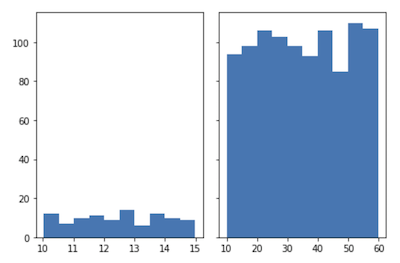

In [26]:
# 1. Definir la función que genera números aleatorios distribuidos uniformemente
def distribution(bottom, ceiling, count):
    # Generar los números aleatorios uniformemente distribuidos
    random_numbers = uniform.rvs(loc=bottom, scale=ceiling-bottom, size=count)
    return random_numbers  # Devolver la matriz de números generados

# 2. Ejemplos de uso
data1 = distribution(10, 15, 100)   # 100 números entre 10 y 15
data2 = distribution(10, 60, 1000)  # 1000 números entre 10 y 60

(array([17.,  8.,  9., 12., 10.,  4., 10., 12.,  7., 11.]),
 array([10.01347876, 10.49897527, 10.98447179, 11.46996831, 11.95546483,
        12.44096135, 12.92645786, 13.41195438, 13.8974509 , 14.38294742,
        14.86844394]),
 <BarContainer object of 10 artists>)

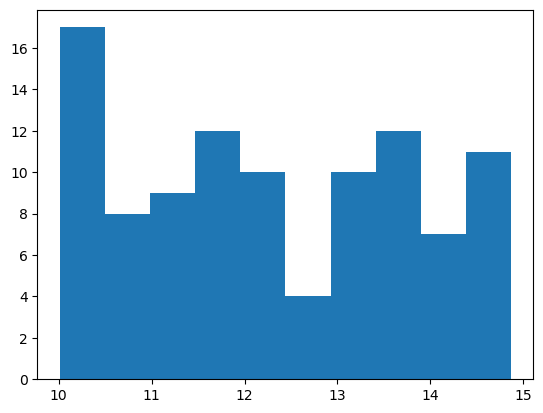

In [22]:
# 3. Histogramas de las distribuciones generadas
# Histograma data1
plt.hist(data1)

(array([ 99., 103.,  82., 108., 101.,  94., 107.,  98.,  95., 113.]),
 array([10.00434589, 14.9982827 , 19.99221951, 24.98615632, 29.98009313,
        34.97402995, 39.96796676, 44.96190357, 49.95584038, 54.94977719,
        59.943714  ]),
 <BarContainer object of 10 artists>)

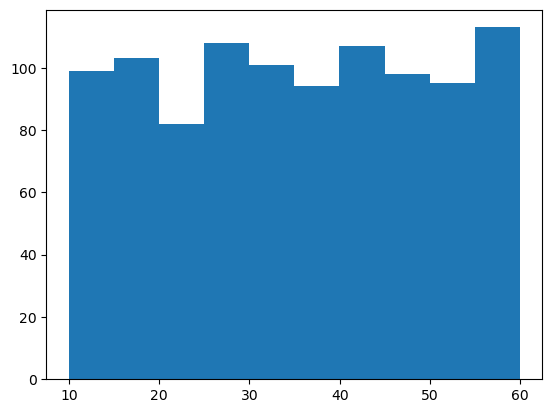

In [24]:
# 3. Histogramas de las distribuciones generadas
# Histograma data2
plt.hist(data2)

How are the two distributions different?

In [6]:
'''
El primer histograma con un valor máximo menor y con menos números generados es menos uniforme
'''

## Distribución Normal

1. De la misma manera en el reto de Distribución Uniforme, escriba una función que genere números aleatorios distribuidos normalmente.
1. Genera 1.000 números distribuidos normalmente con media de 10 y desviación típica de 1
1. Genera 1.000 números distribuidos normalmente con una media de 10 y una desviación típica de 50
2. Representa gráficamente las distribuciones de los datos generados.

Resultado esperado:

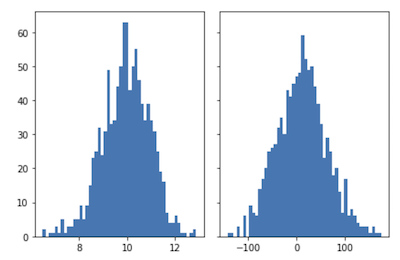

In [30]:
from scipy.stats import norm 

In [34]:
# Definir los parámetros de la distribución normal
mean = 0       # media
std = 1    # desviación estándar
count = 10     # cantidad de números a generar

# Generar varios números aleatorios
random_numbers_norm = norm.rvs(loc=mean, scale=std, size=count)

print("Varios números aleatorios:", random_numbers_norm)

Varios números aleatorios: [-0.61477406  0.2222837   0.41012677 -0.02127346  0.0334682   1.09035446
  2.41350551 -2.16793003  1.01160489 -1.08346574]


In [38]:
# 1. Definir la función que genera números aleatorios con distribución normal
def normal(mean, std, count):
    # Generar los números aleatorios uniformemente distribuidos
    random_numbers_norm = norm.rvs(loc=mean, scale=std, size=count)
    return random_numbers_norm  # Devolver la matriz de números generados

# 2. Ejemplos de uso
norm1 = normal(10, 1, 1000)   # 100 números entre 10 y 15
norm2 = normal(10, 50, 1000)  # 1000 números entre 10 y 60

(array([  1.,  25., 100., 190., 256., 241., 132.,  46.,   7.,   2.]),
 array([ 6.84460515,  7.51590489,  8.18720464,  8.85850438,  9.52980413,
        10.20110387, 10.87240362, 11.54370336, 12.21500311, 12.88630285,
        13.5576026 ]),
 <BarContainer object of 10 artists>)

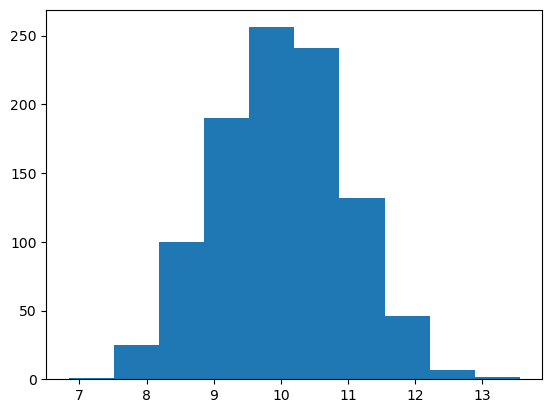

In [40]:
# 3. Histogramas de las distribuciones generadas
# Histograma norm1
plt.hist(norm1)

(array([  3.,  11.,  56., 122., 201., 252., 199., 100.,  44.,  12.]),
 array([-158.49716592, -127.3913219 ,  -96.28547787,  -65.17963384,
         -34.07378982,   -2.96794579,   28.13789824,   59.24374226,
          90.34958629,  121.45543032,  152.56127434]),
 <BarContainer object of 10 artists>)

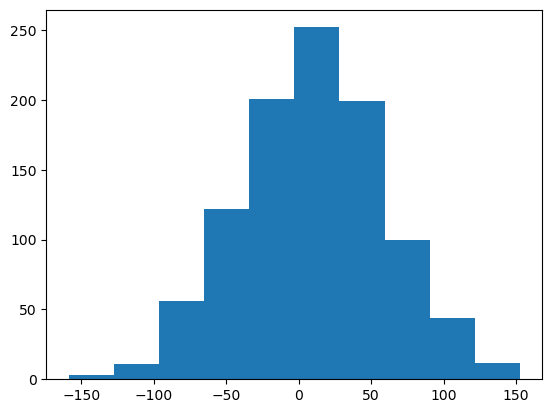

In [42]:
# 3. Histogramas de las distribuciones generadas
# Histograma norm2
plt.hist(norm2)

How are the two distributions different?

La desviación mayor en la segunda distribución normal crea un histograma más disperso, con una escala entre -150 y 150.

## Distribución Normal de Datos Reales

En este reto vamos a echar un vistazo a los datos reales. Utilizaremos el archivo vehicles.csv para este ejercicio

In [46]:
# Importar dataset vehicles.csv
vehicles = pd.read_csv('vehicles.csv')

vehicles.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Primero importa vehicles.csv.
A continuación, traza los histogramas de las siguientes variables:

1. Barriles de combustible/año

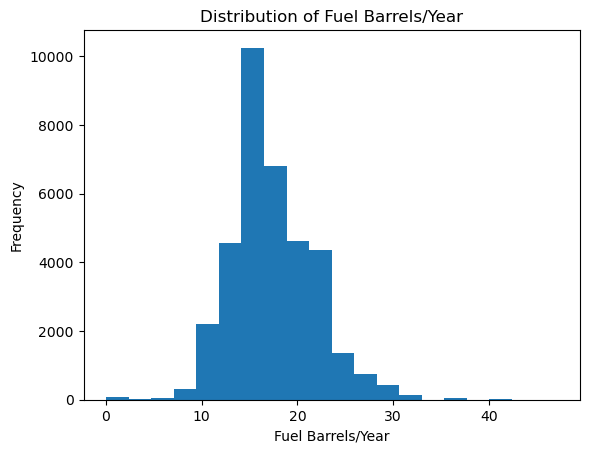

In [52]:
plt.hist(vehicles["Fuel Barrels/Year"], bins=20)
plt.xlabel('Fuel Barrels/Year')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Barrels/Year')
plt.show()

2. Emisiones de CO2 Gramos/Milla 

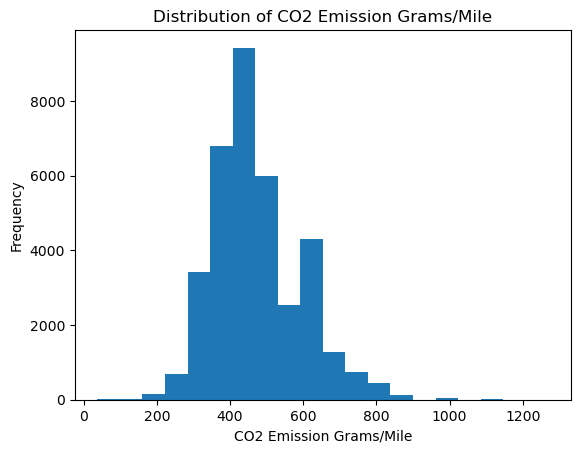

In [58]:
plt.hist(vehicles["CO2 Emission Grams/Mile"], bins=20)
plt.xlabel('CO2 Emission Grams/Mile')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Emission Grams/Mile')
plt.show()

3. MPG combinado

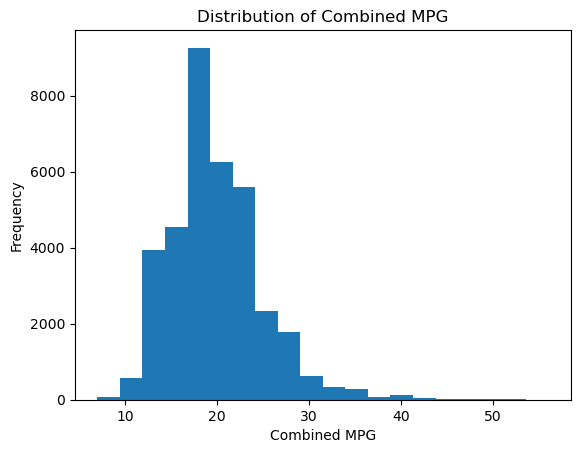

In [60]:
plt.hist(vehicles["Combined MPG"], bins=20)
plt.xlabel('Combined MPG')
plt.ylabel('Frequency')
plt.title('Distribution of Combined MPG')
plt.show()

¿Cuál o cuáles de las variables tienen una distribución casi normal? ¿Cómo lo sabes?

In [70]:
from scipy.stats import kstest

variables = ["Combined MPG", "CO2 Emission Grams/Mile", "Fuel Barrels/Year"]

for var in variables:
    stat, p = kstest(vehicles[var].dropna(), 'norm')
    print(f'K-S Test for {var}: p-value = {p}')
    if p > 0.05:
        print(f'{var} appears to be normally distributed')
    else:
        print(f'{var} does not appear to be normally distributed')

K-S Test for Combined MPG: p-value = 0.0
Combined MPG does not appear to be normally distributed
K-S Test for CO2 Emission Grams/Mile: p-value = 0.0
CO2 Emission Grams/Mile does not appear to be normally distributed
K-S Test for Fuel Barrels/Year: p-value = 0.0
Fuel Barrels/Year does not appear to be normally distributed


Ninguno de ellos está normalmente ditribuido. 

## Distribución Exponencial

1. Utilizando `numpy.random.exponential`, crea una función que devuelva una lista de números distribuidos exponencialmente con la media de 10. 

1. Utiliza la función para generar dos secuencias de números de tamaño 10 y 100.

1. 2. Traza las distribuciones como histogramas con el número de bins como 100.

El resultado debe ser como el siguiente:

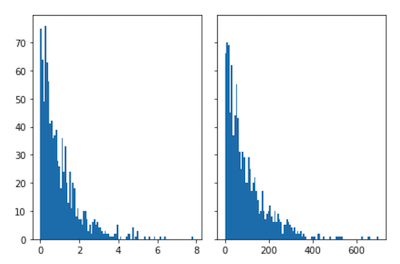

In [92]:
# Definir los parámetros de la distribución exponencial
mean = 2   
size = 5  
    
# Generar varios números aleatorios
random_exponential = np.random.exponential(scale=mean, size=size)

print("Varios números aleatorios:", random_exponential)

Varios números aleatorios: [1.10135583 3.50927073 0.20228018 1.75764835 0.62838033]


In [94]:
# 1. Definir la función que genera números aleatorios con distribución exponencial
def exponential(scale, size):
    # Generar los números aleatorios exponencialmente distribuidos
    random_exponential = np.random.exponential(scale=scale, size=size)
    return random_exponential # Devolver la matriz de números generados

# 2. Ejemplos de uso
exp1 = exponential(10, 10)   # 10 números
exp2 = exponential(10, 100 )  # 100 números

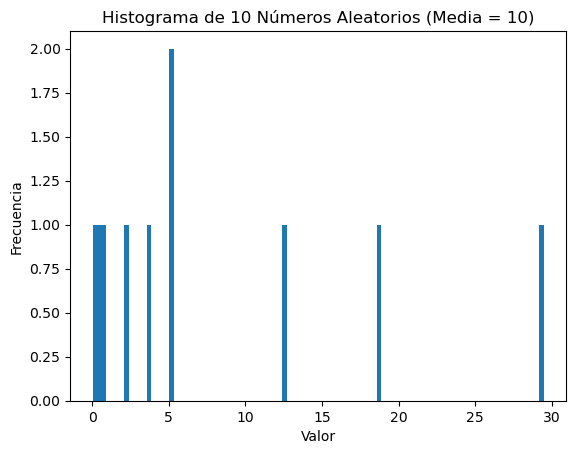

In [96]:
# 3. Histogramas de las distribuciones generadas
# Histograma exp1
plt.hist(exp1, bins=100)
plt.title('Histograma de 10 Números Aleatorios (Media = 10)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

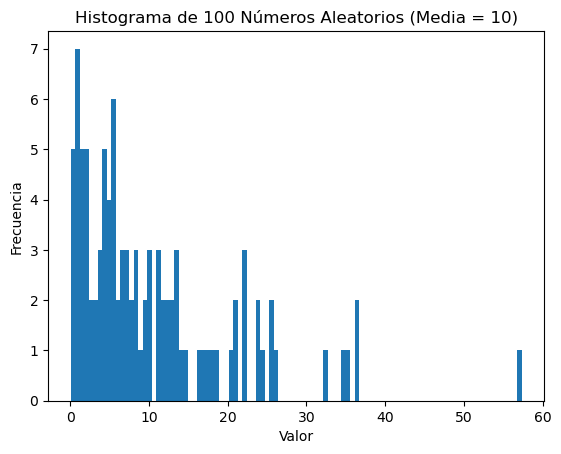

In [98]:
# 3. Histogramas de las distribuciones generadas
# Histograma exp1
plt.hist(exp2, bins=100)
plt.title('Histograma de 100 Números Aleatorios (Media = 10)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

¿En qué se diferencian ambas distribuciones?

La media cambia, por lo que la distribución también cambia. 

## Distribución Exponencial de datos reales

Supongamos que el tiempo que uno pasa en un banco se distribuye exponencialmente con media de 10 minutos (es decir, λ = 1/10). ¿Cuál es la probabilidad de que un cliente pase menos de quince minutos en el banco? 

Escribe un código en python para resolver este problema

In [116]:
# Parametros de la distribución
λ = 1/10
mean = 10
x = 15 # Tiempo a evaluar

# Formula CDF P(X≤x)= 1 − e ^−λx

# Cálculo de la probabilidad de que un cliente pase menos de 15 minutos en el banco
probability = 1 - np.exp(-λ * x)


¿Cuál es la probabilidad de que el cliente pase más de 15 minutos?

In [114]:
# Imprimir el resultado
print(f"La probabilidad de que un cliente pase menos de {x} minutos en el banco es: {probability:.4f}")

La probabilidad de que un cliente pase menos de 15 minutos en el banco es: 0.7769
